In [1]:
import numpy as np
import pandas as pd
import string # special operations on strings
import spacy # language models
from matplotlib.pyplot import imread
from matplotlib import pyplot as plt
from wordcloud import WordCloud
import seaborn as sns

In [2]:
data=pd.read_excel('hotel_reviews.xlsx')
data

,Review,Rating
0,nice hotel expensive parking got good deal sta...,4.0
1,ok nothing special charge diamond member hilto...,2.0
2,nice rooms not 4* experience hotel monaco seat...,3.0
3,"unique, great stay, wonderful time hotel monac...",5.0
4,"great stay great stay, went seahawk game aweso...",5.0
...,...,...
20486,"best kept secret 3rd time staying charm, not 5...",5.0
20487,great location price view hotel great quick pl...,4.0
20488,"ok just looks nice modern outside, desk staff ...",2.0
20489,hotel theft ruined vacation hotel opened sept ...,1.0


In [3]:
from mpl_toolkits.mplot3d import Axes3D
import plotly.graph_objects as go
import plotly.express as px
from wordcloud import STOPWORDS
import re

In [4]:
data.info() #no null values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20491 entries, 0 to 20490
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Review  20491 non-null  object 
 1   Rating  20491 non-null  float64
dtypes: float64(1), object(1)
memory usage: 320.3+ KB


In [5]:
data.describe()

,Rating
count,20491.000000
mean,3.952223
std,1.233030
min,1.000000
25%,3.000000
50%,4.000000
75%,5.000000
max,5.000000


In [6]:
data.duplicated().sum() #no duplicates in given dataset

0

C:\Users\NALLI NISHETHA\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Rating', ylabel='count'>

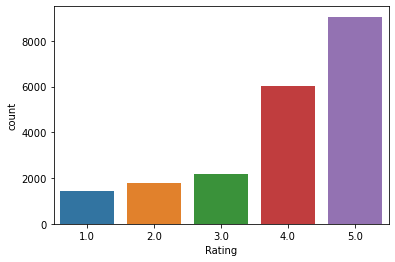

In [7]:
sns.countplot(data['Rating'])

In [8]:
data['Rating'].value_counts()

5.0    9054
4.0    6039
3.0    2184
2.0    1793
1.0    1421
Name: Rating, dtype: int64

In [9]:
percent={1421/20491,
6039/20491,2184/20491,1793/20491,9054/20491}
sorted(percent,reverse=True)

[0.44185252061880825,
 0.2947147528183105,
 0.10658337806842028,
 0.08750183007173881,
 0.06934751842272217]

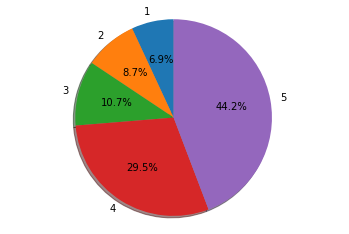

In [10]:
import matplotlib.pyplot as plt

# Pie chart, where the slices will be ordered and plotted counter-clockwise:
labels = '1', '2', '3', '4', '5'
sizes = [6.93, 8.7, 10.65, 29.47, 44.18]
explode = (0, 0, 0, 0, 0)  # only "explode" the 2nd slice (i.e. 'Hogs')

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()


In [11]:
data['Lenght']=data['Review'].apply(len)
data

,Review,Rating,Lenght
0,nice hotel expensive parking got good deal sta...,4.0,593
1,ok nothing special charge diamond member hilto...,2.0,1689
2,nice rooms not 4* experience hotel monaco seat...,3.0,1427
3,"unique, great stay, wonderful time hotel monac...",5.0,600
4,"great stay great stay, went seahawk game aweso...",5.0,1281
...,...,...,...
20486,"best kept secret 3rd time staying charm, not 5...",5.0,733
20487,great location price view hotel great quick pl...,4.0,306
20488,"ok just looks nice modern outside, desk staff ...",2.0,443
20489,hotel theft ruined vacation hotel opened sept ...,1.0,5557


In [12]:
data['Lenght'].describe()

count    20491.000000
mean       725.245571
std        689.933070
min         44.000000
25%        339.000000
50%        537.000000
75%        859.000000
max      13501.000000
Name: Lenght, dtype: float64

<AxesSubplot:xlabel='Rating', ylabel='Lenght'>

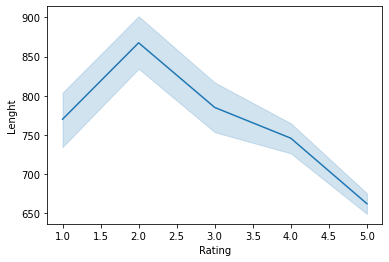

In [13]:
sns.lineplot(x='Rating',y='Lenght',data=data)

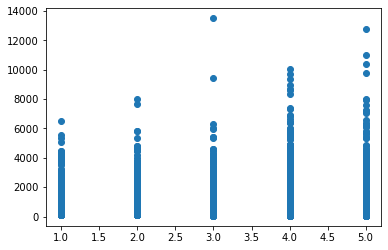

In [14]:
plt.scatter(x='Rating',y='Lenght',data=data)

In [15]:
df5=data[data['Rating']==5]
df5

,Review,Rating,Lenght
3,"unique, great stay, wonderful time hotel monac...",5.0,600
4,"great stay great stay, went seahawk game aweso...",5.0,1281
5,love monaco staff husband stayed hotel crazy w...,5.0,1002
6,"cozy stay rainy city, husband spent 7 nights m...",5.0,748
8,"hotel stayed hotel monaco cruise, rooms genero...",5.0,419
...,...,...,...
20473,best best reason affordable better hotels city...,5.0,152
20476,"night not trust not disappointed stay hotel, s...",5.0,1082
20480,great play stay stay loyal inn package deal ha...,5.0,256
20482,great choice wife chose best western quite bit...,5.0,716


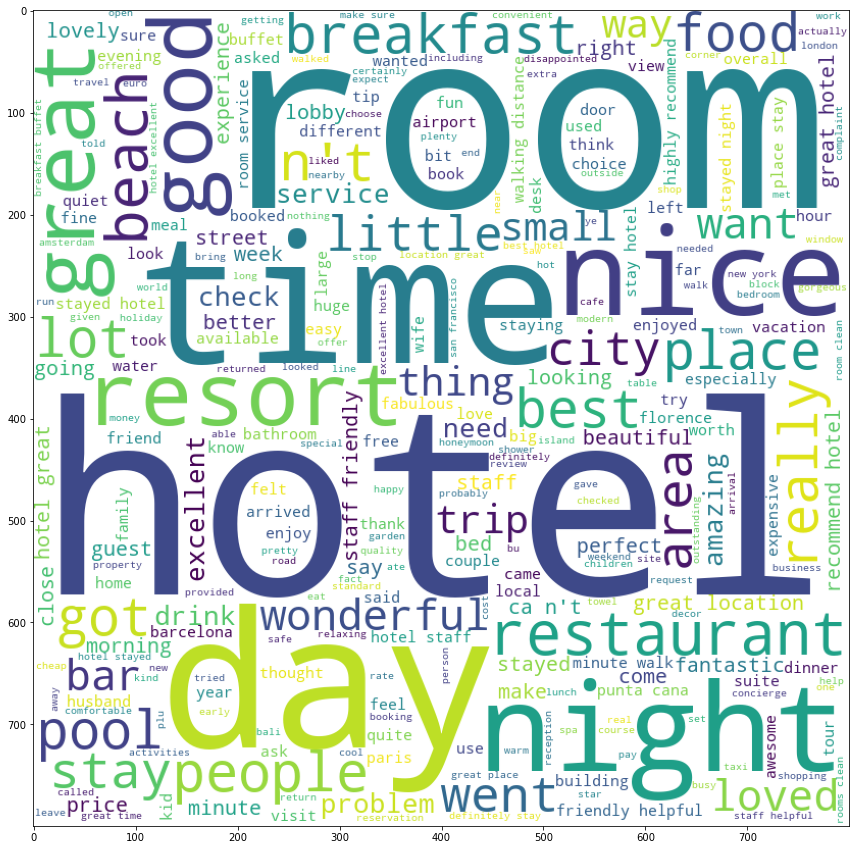

In [16]:
plt.figure(figsize=(15,15))
wc1 = WordCloud(max_words=1000, min_font_size=10, 
                height=800,width=800,background_color="white").generate(' '.join(df5['Review']))

plt.imshow(wc1)

In [17]:
df4=data[data['Rating']==4]
df4

,Review,Rating,Lenght
0,nice hotel expensive parking got good deal sta...,4.0,593
7,"excellent staff, housekeeping quality hotel ch...",4.0,597
11,nice value seattle stayed 4 nights late 2007. ...,4.0,364
12,nice hotel good location hotel kimpton design ...,4.0,569
14,"great hotel night quick business trip, loved l...",4.0,202
...,...,...,...
20475,good stay spent night pacific northwest/northe...,4.0,441
20477,nice hotel pioneer square area stayed late aug...,4.0,454
20478,"just fine, hotel located pioneer square just q...",4.0,727
20483,good bed clean convenient just night happy sta...,4.0,420


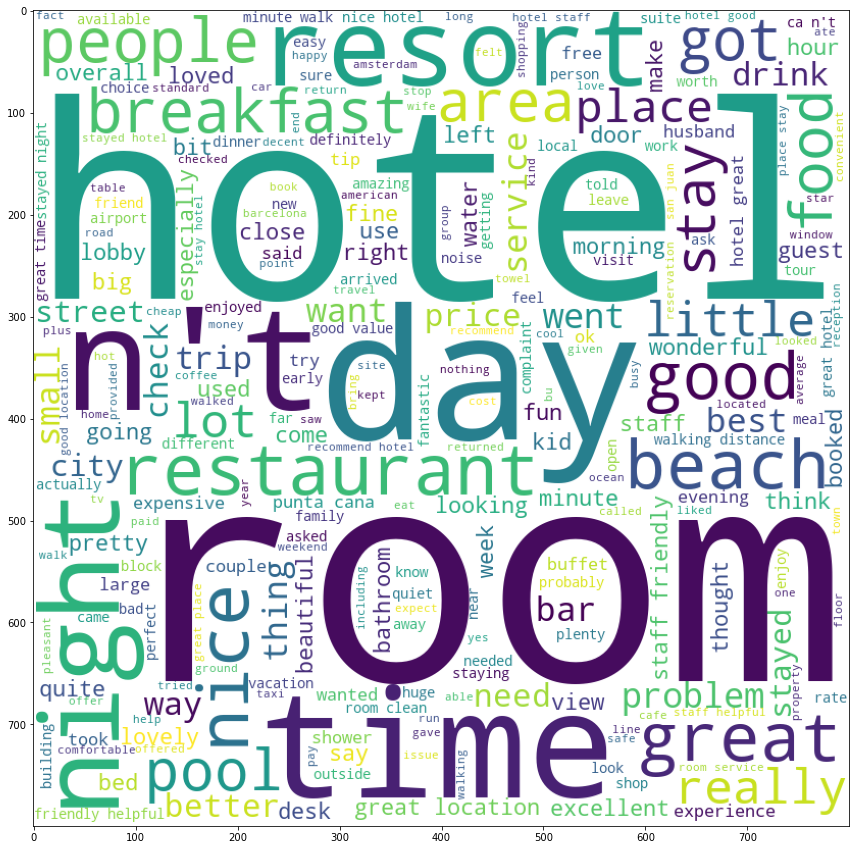

In [18]:
plt.figure(figsize=(15,15))
wc2 = WordCloud(max_words=1000, min_font_size=10, 
                height=800,width=800,background_color="white").generate(' '.join(df4['Review']))

plt.imshow(wc2)

In [19]:
df3=data[data['Rating']==3]
df3

,Review,Rating,Lenght
2,nice rooms not 4* experience hotel monaco seat...,3.0,1427
13,nice hotel not nice staff hotel lovely staff q...,3.0,417
19,hmmmmm say really high hopes hotel monaco chos...,3.0,1025
25,"n't mind noise place great, read reviews noise...",3.0,482
27,met expectations centrally located hotel block...,3.0,538
...,...,...,...
20406,good good great location new clean modern bath...,3.0,376
20408,"ok ok. room clean tidy, staff friendly, good h...",3.0,165
20419,"nice try stayed hotel day grand opening, booke...",3.0,699
20446,"ok short stay booked hotel night stopover, sin...",3.0,566


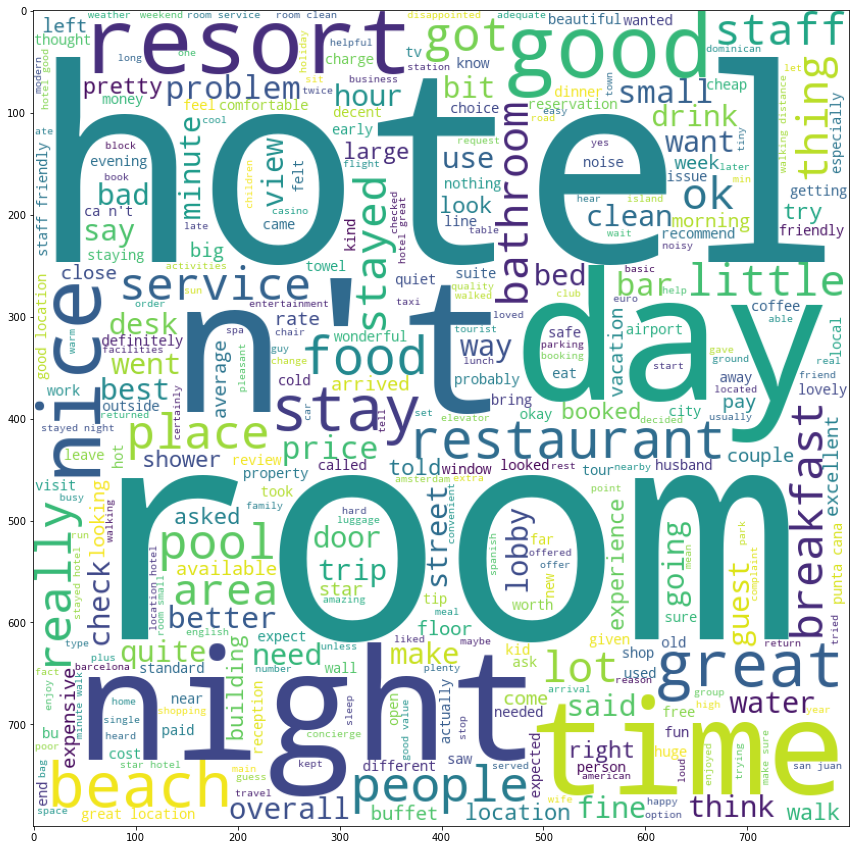

In [20]:
plt.figure(figsize=(15,15))
wc3 = WordCloud(max_words=1000, min_font_size=10, 
                height=800,width=800,background_color="white").generate(' '.join(df3['Review']))

plt.imshow(wc3)

In [21]:
df2=data[data['Rating']==2]
df2

,Review,Rating,Lenght
1,ok nothing special charge diamond member hilto...,2.0,1689
10,"poor value stayed monaco seattle july, nice ho...",2.0,333
16,disappointed say anticipating stay hotel monac...,2.0,1662
24,great location need internally upgrade advanta...,2.0,250
33,good location poor cleanliness warwick hotel g...,2.0,576
...,...,...,...
20481,ok price look hotel ok little run average clea...,2.0,247
20484,deceptive staff deceptive desk staff claiming ...,2.0,695
20485,not impressed unfriendly staff checked asked h...,2.0,616
20488,"ok just looks nice modern outside, desk staff ...",2.0,443


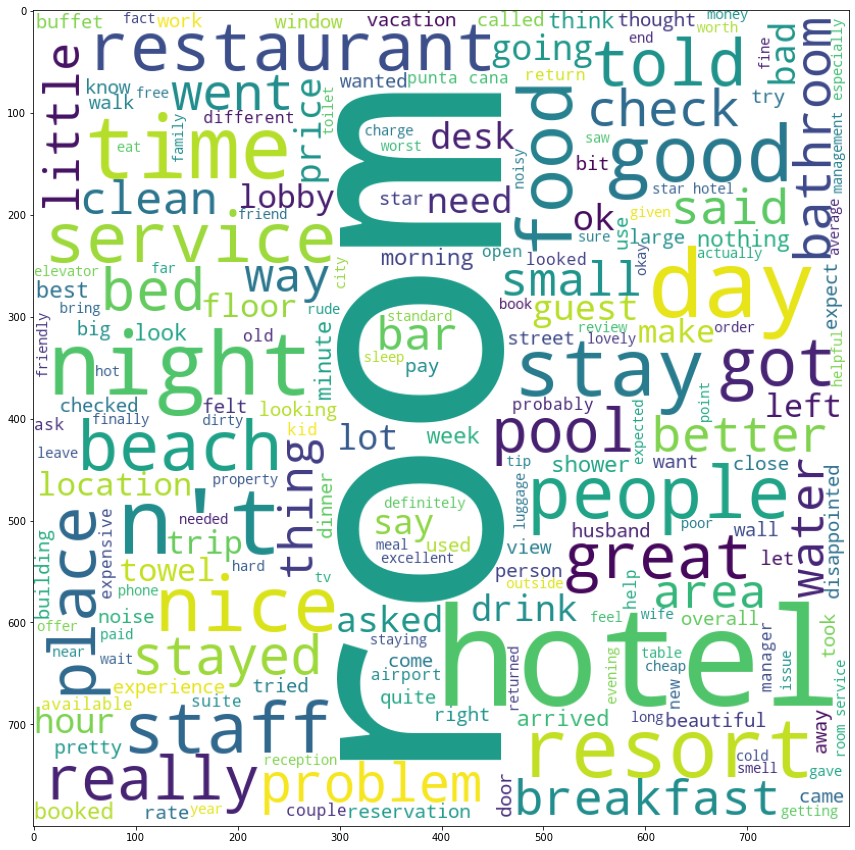

In [22]:
plt.figure(figsize=(15,15))
wc4 = WordCloud(max_words=1000, min_font_size=10, 
                height=800,width=800,background_color="white").generate(' '.join(df2['Review']))

plt.imshow(wc4)

In [23]:
df1=data[data['Rating']==1]
df1

,Review,Rating,Lenght
15,horrible customer service hotel stay february ...,1.0,1411
32,"noise airconditioner-a standard, arranged stay...",1.0,614
40,"bad choice, booked hotel hot wire called immed...",1.0,861
65,"hated inn terrible, room-service horrible staf...",1.0,133
69,ace grunge lives does mold mildew tiny bed met...,1.0,84
...,...,...,...
20421,worst sleep hip tooooo hip nite club building ...,1.0,342
20460,"june 08 stay stayed hotel june 6/6-6/8/08, rea...",1.0,682
20465,not stay hotel brought group february worst ho...,1.0,305
20467,returning la concha nightmare surprising hotel...,1.0,460


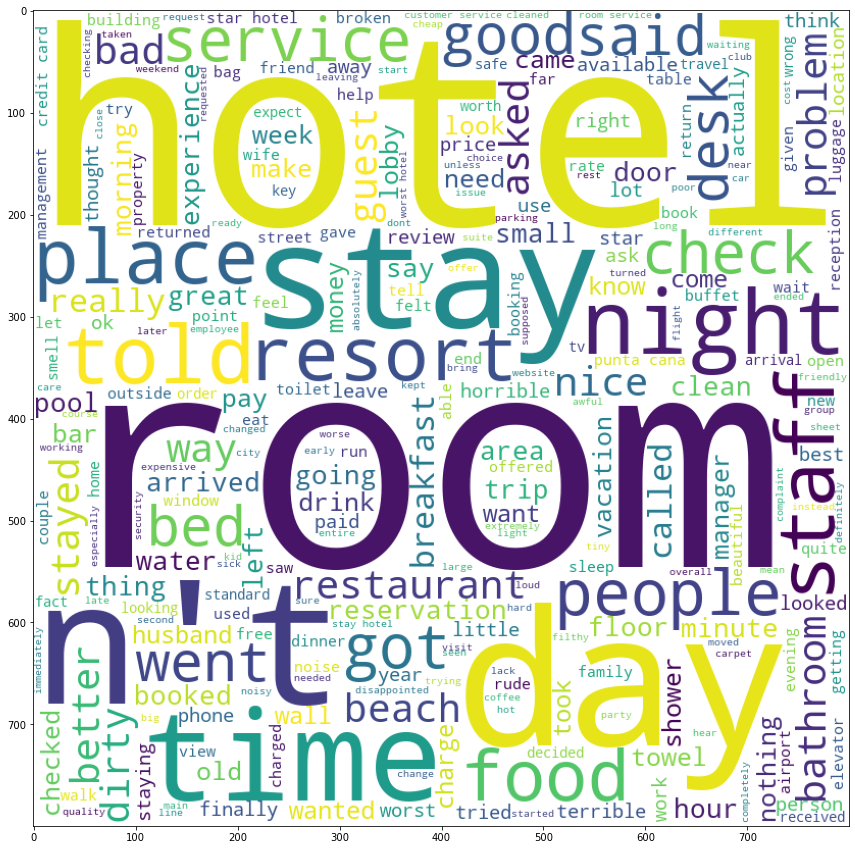

In [24]:
plt.figure(figsize=(15,15))
wc5 = WordCloud(max_words=1000, min_font_size=10, 
                height=800,width=800,background_color="white").generate(' '.join(df1['Review']))

plt.imshow(wc5)

In [25]:
import nltk
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer

In [26]:
quo=data.iloc[0,0]
quo

'nice hotel expensive parking got good deal stay hotel anniversary, arrived late evening took advice previous reviews did valet parking, check quick easy, little disappointed non-existent view room room clean nice size, bed comfortable woke stiff neck high pillows, not soundproof like heard music room night morning loud bangs doors opening closing hear people talking hallway, maybe just noisy neighbors, aveda bath products nice, did not goldfish stay nice touch taken advantage staying longer, location great walking distance shopping, overall nice experience having pay 40 parking night,  '

In [27]:
quo=re.sub('[^a-zA-Z0-9]',' ',quo)
quo=quo.lower().split()
quo

['nice',
 'hotel',
 'expensive',
 'parking',
 'got',
 'good',
 'deal',
 'stay',
 'hotel',
 'anniversary',
 'arrived',
 'late',
 'evening',
 'took',
 'advice',
 'previous',
 'reviews',
 'did',
 'valet',
 'parking',
 'check',
 'quick',
 'easy',
 'little',
 'disappointed',
 'non',
 'existent',
 'view',
 'room',
 'room',
 'clean',
 'nice',
 'size',
 'bed',
 'comfortable',
 'woke',
 'stiff',
 'neck',
 'high',
 'pillows',
 'not',
 'soundproof',
 'like',
 'heard',
 'music',
 'room',
 'night',
 'morning',
 'loud',
 'bangs',
 'doors',
 'opening',
 'closing',
 'hear',
 'people',
 'talking',
 'hallway',
 'maybe',
 'just',
 'noisy',
 'neighbors',
 'aveda',
 'bath',
 'products',
 'nice',
 'did',
 'not',
 'goldfish',
 'stay',
 'nice',
 'touch',
 'taken',
 'advantage',
 'staying',
 'longer',
 'location',
 'great',
 'walking',
 'distance',
 'shopping',
 'overall',
 'nice',
 'experience',
 'having',
 'pay',
 '40',
 'parking',
 'night']

In [28]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to C:\Users\NALLI
[nltk_data]     NISHETHA\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [29]:
sw=set(stopwords.words('english'))
print(sw)

{"you'd", 'your', 'who', 'whom', 'be', 'that', 'mustn', 'as', 'of', 'and', 'theirs', 'out', 'any', 'more', 'won', 'wouldn', "wasn't", 'now', 'then', 'her', 'were', 'does', 'for', 'those', 'don', 'or', 'she', 'which', 'm', 'shan', 'to', 'their', 'down', 'than', 'can', 'himself', 'most', 'will', 'these', 'was', 'through', 'here', 'above', "couldn't", 'no', "hadn't", 'had', 'when', 'nor', 'very', 'how', 'his', 'by', "you're", 'once', "weren't", "you'll", 'herself', 'from', 'wasn', 'doesn', "she's", 'under', 'during', "hasn't", 'y', "didn't", 'ain', "should've", 'after', 'ma', 'the', 'he', 'up', 'each', 'an', 'same', 'my', "isn't", "that'll", 'is', 'other', "aren't", 'ourselves', 'needn', 'over', 'between', 'isn', 'shouldn', 'me', 'own', 'yourself', 'll', "won't", 'it', 've', 'on', 'yourselves', 'you', 'all', 'myself', 'some', 'a', 'did', "shouldn't", 'before', 'doing', "needn't", 'couldn', 'further', 'but', 'them', 'not', 'our', 'few', 'being', 't', 'while', 'there', 'him', 'ours', "doesn

In [30]:
clean_word=[i for i in quo if not i in sw]
clean_word

['nice',
 'hotel',
 'expensive',
 'parking',
 'got',
 'good',
 'deal',
 'stay',
 'hotel',
 'anniversary',
 'arrived',
 'late',
 'evening',
 'took',
 'advice',
 'previous',
 'reviews',
 'valet',
 'parking',
 'check',
 'quick',
 'easy',
 'little',
 'disappointed',
 'non',
 'existent',
 'view',
 'room',
 'room',
 'clean',
 'nice',
 'size',
 'bed',
 'comfortable',
 'woke',
 'stiff',
 'neck',
 'high',
 'pillows',
 'soundproof',
 'like',
 'heard',
 'music',
 'room',
 'night',
 'morning',
 'loud',
 'bangs',
 'doors',
 'opening',
 'closing',
 'hear',
 'people',
 'talking',
 'hallway',
 'maybe',
 'noisy',
 'neighbors',
 'aveda',
 'bath',
 'products',
 'nice',
 'goldfish',
 'stay',
 'nice',
 'touch',
 'taken',
 'advantage',
 'staying',
 'longer',
 'location',
 'great',
 'walking',
 'distance',
 'shopping',
 'overall',
 'nice',
 'experience',
 'pay',
 '40',
 'parking',
 'night']

In [31]:
sen=' '.join(clean_word)
sen

'nice hotel expensive parking got good deal stay hotel anniversary arrived late evening took advice previous reviews valet parking check quick easy little disappointed non existent view room room clean nice size bed comfortable woke stiff neck high pillows soundproof like heard music room night morning loud bangs doors opening closing hear people talking hallway maybe noisy neighbors aveda bath products nice goldfish stay nice touch taken advantage staying longer location great walking distance shopping overall nice experience pay 40 parking night'

In [48]:
def text_preprocessing(quo):
  quo=re.sub('[^a-zA-Z]',' ',quo)
  quo=quo.lower().split()
  clean_word=[i for i in quo if not i in sw]
  sen=' '.join(clean_word)
  return sen


In [ ]:
ps=PorterStemmer()
  clean_word=[ps.stem(i) for i in quo if not i in sw]

In [49]:
data['clean_word']=data["Review"].apply(text_preprocessing)
data.head()

,Review,Rating,Lenght,clean_word
0,nice hotel expensive parking got good deal sta...,4.0,593,nice hotel expensive parking got good deal sta...
1,ok nothing special charge diamond member hilto...,2.0,1689,ok nothing special charge diamond member hilto...
2,nice rooms not 4* experience hotel monaco seat...,3.0,1427,nice rooms experience hotel monaco seattle goo...
3,"unique, great stay, wonderful time hotel monac...",5.0,600,unique great stay wonderful time hotel monaco ...
4,"great stay great stay, went seahawk game aweso...",5.0,1281,great stay great stay went seahawk game awesom...


In [50]:
data['Length 2'] = data['clean_word'].apply(len)
data.head()

,Review,Rating,Lenght,clean_word,Length 2
0,nice hotel expensive parking got good deal sta...,4.0,593,nice hotel expensive parking got good deal sta...,549
1,ok nothing special charge diamond member hilto...,2.0,1689,ok nothing special charge diamond member hilto...,1583
2,nice rooms not 4* experience hotel monaco seat...,3.0,1427,nice rooms experience hotel monaco seattle goo...,1316
3,"unique, great stay, wonderful time hotel monac...",5.0,600,unique great stay wonderful time hotel monaco ...,568
4,"great stay great stay, went seahawk game aweso...",5.0,1281,great stay great stay went seahawk game awesom...,1182


In [51]:
data.describe()

,Rating,Lenght,Length 2
count,20491.000000,20491.000000,20491.000000
mean,3.952223,725.245571,677.061783
std,1.233030,689.933070,638.939238
min,1.000000,44.000000,36.000000
25%,3.000000,339.000000,319.000000
50%,4.000000,537.000000,502.000000
75%,5.000000,859.000000,805.000000
max,5.000000,13501.000000,12724.000000


In [52]:
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
from nltk.tokenize import WhitespaceTokenizer

In [53]:
lemmatizer = WordNetLemmatizer()
w_tokenizer=WhitespaceTokenizer()

In [54]:
from nltk import pos_tag
import nltk
nltk.download('averaged_perceptron_tagger')
nltk.download('all')

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\NALLI NISHETHA\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping taggers\averaged_perceptron_tagger.zip.
[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to C:\Users\NALLI
[nltk_data]    |     NISHETHA\AppData\Roaming\nltk_data...
[nltk_data]    |   Unzipping corpora\abc.zip.
[nltk_data]    | Downloading package alpino to C:\Users\NALLI
[nltk_data]    |     NISHETHA\AppData\Roaming\nltk_data...
[nltk_data]    |   Unzipping corpora\alpino.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     C:\Users\NALLI
[nltk_data]    |     NISHETHA\AppData\Roaming\nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger is already up-
[nltk_data]    |       to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     C:\Users\NALLI
[nltk_data]    |     NISHETHA\AppData\Roami

True

In [55]:
def lemmatize(txt):
  """
  This function takes text string as input lemmatize it to its root/base/stem word.
  """
  list_review=[lemmatizer.lemmatize(word=word, pos=tag[0].lower()) if tag[0].lower() in ['a','r','n','v'] else word for word, tag in pos_tag(w_tokenizer.tokenize(txt))]
  return (' '.join([x for x in list_review if x]))

In [56]:
data['Lemmatized_Review']=data['clean_word'].apply(lambda x: lemmatize(x))

In [57]:
data

,Review,Rating,Lenght,clean_word,Length 2,Lemmatized_Review
0,nice hotel expensive parking got good deal sta...,4.0,593,nice hotel expensive parking got good deal sta...,549,nice hotel expensive parking get good deal sta...
1,ok nothing special charge diamond member hilto...,2.0,1689,ok nothing special charge diamond member hilto...,1583,ok nothing special charge diamond member hilto...
2,nice rooms not 4* experience hotel monaco seat...,3.0,1427,nice rooms experience hotel monaco seattle goo...,1316,nice room experience hotel monaco seattle good...
3,"unique, great stay, wonderful time hotel monac...",5.0,600,unique great stay wonderful time hotel monaco ...,568,unique great stay wonderful time hotel monaco ...
4,"great stay great stay, went seahawk game aweso...",5.0,1281,great stay great stay went seahawk game awesom...,1182,great stay great stay go seahawk game awesome ...
...,...,...,...,...,...,...
20486,"best kept secret 3rd time staying charm, not 5...",5.0,733,best kept secret rd time staying charm star ca...,699,best kept secret rd time stay charm star ca n ...
20487,great location price view hotel great quick pl...,4.0,306,great location price view hotel great quick pl...,303,great location price view hotel great quick pl...
20488,"ok just looks nice modern outside, desk staff ...",2.0,443,ok looks nice modern outside desk staff n part...,418,ok look nice modern outside desk staff n parti...
20489,hotel theft ruined vacation hotel opened sept ...,1.0,5557,hotel theft ruined vacation hotel opened sept ...,5263,hotel theft ruin vacation hotel open sept gues...


In [58]:
data['Length 3'] = data['Lemmatized_Review'].apply(len)
data.head()

,Review,Rating,Lenght,clean_word,Length 2,Lemmatized_Review,Length 3
0,nice hotel expensive parking got good deal sta...,4.0,593,nice hotel expensive parking got good deal sta...,549,nice hotel expensive parking get good deal sta...,522
1,ok nothing special charge diamond member hilto...,2.0,1689,ok nothing special charge diamond member hilto...,1583,ok nothing special charge diamond member hilto...,1515
2,nice rooms not 4* experience hotel monaco seat...,3.0,1427,nice rooms experience hotel monaco seattle goo...,1316,nice room experience hotel monaco seattle good...,1266
3,"unique, great stay, wonderful time hotel monac...",5.0,600,unique great stay wonderful time hotel monaco ...,568,unique great stay wonderful time hotel monaco ...,541
4,"great stay great stay, went seahawk game aweso...",5.0,1281,great stay great stay went seahawk game awesom...,1182,great stay great stay go seahawk game awesome ...,1103


In [59]:
data.describe()

,Rating,Lenght,Length 2,Length 3
count,20491.000000,20491.000000,20491.000000,20491.000000
mean,3.952223,725.245571,677.061783,645.851789
std,1.233030,689.933070,638.939238,605.607151
min,1.000000,44.000000,36.000000,32.000000
25%,3.000000,339.000000,319.000000,306.000000
50%,4.000000,537.000000,502.000000,480.000000
75%,5.000000,859.000000,805.000000,769.000000
max,5.000000,13501.000000,12724.000000,12015.000000


In [60]:
def rating(score):
    if score > 3:
        return 'Positive'
    elif score == 3:
        return 'Neutral'
    else:
        return 'Negative'

In [61]:
data['Emotion']=data['Rating'].apply(rating)
data

,Review,Rating,Lenght,clean_word,Length 2,Lemmatized_Review,Length 3,Emotion
0,nice hotel expensive parking got good deal sta...,4.0,593,nice hotel expensive parking got good deal sta...,549,nice hotel expensive parking get good deal sta...,522,Positive
1,ok nothing special charge diamond member hilto...,2.0,1689,ok nothing special charge diamond member hilto...,1583,ok nothing special charge diamond member hilto...,1515,Negative
2,nice rooms not 4* experience hotel monaco seat...,3.0,1427,nice rooms experience hotel monaco seattle goo...,1316,nice room experience hotel monaco seattle good...,1266,Neutral
3,"unique, great stay, wonderful time hotel monac...",5.0,600,unique great stay wonderful time hotel monaco ...,568,unique great stay wonderful time hotel monaco ...,541,Positive
4,"great stay great stay, went seahawk game aweso...",5.0,1281,great stay great stay went seahawk game awesom...,1182,great stay great stay go seahawk game awesome ...,1103,Positive
...,...,...,...,...,...,...,...,...
20486,"best kept secret 3rd time staying charm, not 5...",5.0,733,best kept secret rd time staying charm star ca...,699,best kept secret rd time stay charm star ca n ...,665,Positive
20487,great location price view hotel great quick pl...,4.0,306,great location price view hotel great quick pl...,303,great location price view hotel great quick pl...,291,Positive
20488,"ok just looks nice modern outside, desk staff ...",2.0,443,ok looks nice modern outside desk staff n part...,418,ok look nice modern outside desk staff n parti...,399,Negative
20489,hotel theft ruined vacation hotel opened sept ...,1.0,5557,hotel theft ruined vacation hotel opened sept ...,5263,hotel theft ruin vacation hotel open sept gues...,4981,Negative


In [62]:
data['Emotion'].value_counts()

Positive    15093
Negative     3214
Neutral      2184
Name: Emotion, dtype: int64

In [63]:
df=pd.read_excel('hotel_reviews.xlsx')
df

,Review,Rating
0,nice hotel expensive parking got good deal sta...,4.0
1,ok nothing special charge diamond member hilto...,2.0
2,nice rooms not 4* experience hotel monaco seat...,3.0
3,"unique, great stay, wonderful time hotel monac...",5.0
4,"great stay great stay, went seahawk game aweso...",5.0
...,...,...
20486,"best kept secret 3rd time staying charm, not 5...",5.0
20487,great location price view hotel great quick pl...,4.0
20488,"ok just looks nice modern outside, desk staff ...",2.0
20489,hotel theft ruined vacation hotel opened sept ...,1.0


In [64]:
df_neg=df.loc[df['Rating']<3]
df_neg=df_neg.reset_index(drop=True)
df_neg

,Review,Rating
0,ok nothing special charge diamond member hilto...,2.0
1,"poor value stayed monaco seattle july, nice ho...",2.0
2,horrible customer service hotel stay february ...,1.0
3,disappointed say anticipating stay hotel monac...,2.0
4,great location need internally upgrade advanta...,2.0
...,...,...
3209,deceptive staff deceptive desk staff claiming ...,2.0
3210,not impressed unfriendly staff checked asked h...,2.0
3211,"ok just looks nice modern outside, desk staff ...",2.0
3212,hotel theft ruined vacation hotel opened sept ...,1.0


In [65]:
df_neu=df.loc[df['Rating']==3]
df_neu=df_neu.reset_index(drop=True)
df_neu

,Review,Rating
0,nice rooms not 4* experience hotel monaco seat...,3.0
1,nice hotel not nice staff hotel lovely staff q...,3.0
2,hmmmmm say really high hopes hotel monaco chos...,3.0
3,"n't mind noise place great, read reviews noise...",3.0
4,met expectations centrally located hotel block...,3.0
...,...,...
2179,good good great location new clean modern bath...,3.0
2180,"ok ok. room clean tidy, staff friendly, good h...",3.0
2181,"nice try stayed hotel day grand opening, booke...",3.0
2182,"ok short stay booked hotel night stopover, sin...",3.0


In [66]:
df_pos=df.loc[df['Rating']>3]
df_pos=df_pos.reset_index(drop=True)
df_pos

,Review,Rating
0,nice hotel expensive parking got good deal sta...,4.0
1,"unique, great stay, wonderful time hotel monac...",5.0
2,"great stay great stay, went seahawk game aweso...",5.0
3,love monaco staff husband stayed hotel crazy w...,5.0
4,"cozy stay rainy city, husband spent 7 nights m...",5.0
...,...,...
15088,great play stay stay loyal inn package deal ha...,5.0
15089,great choice wife chose best western quite bit...,5.0
15090,good bed clean convenient just night happy sta...,4.0
15091,"best kept secret 3rd time staying charm, not 5...",5.0


In [67]:
datapos=data.loc[data['Rating']>3]
datapos=datapos.reset_index(drop=True)
datapos

,Review,Rating,Lenght,clean_word,Length 2,Lemmatized_Review,Length 3,Emotion
0,nice hotel expensive parking got good deal sta...,4.0,593,nice hotel expensive parking got good deal sta...,549,nice hotel expensive parking get good deal sta...,522,Positive
1,"unique, great stay, wonderful time hotel monac...",5.0,600,unique great stay wonderful time hotel monaco ...,568,unique great stay wonderful time hotel monaco ...,541,Positive
2,"great stay great stay, went seahawk game aweso...",5.0,1281,great stay great stay went seahawk game awesom...,1182,great stay great stay go seahawk game awesome ...,1103,Positive
3,love monaco staff husband stayed hotel crazy w...,5.0,1002,love monaco staff husband stayed hotel crazy w...,953,love monaco staff husband stay hotel crazy wee...,896,Positive
4,"cozy stay rainy city, husband spent 7 nights m...",5.0,748,cozy stay rainy city husband spent nights mona...,706,cozy stay rainy city husband spend night monac...,671,Positive
...,...,...,...,...,...,...,...,...
15088,great play stay stay loyal inn package deal ha...,5.0,256,great play stay stay loyal inn package deal ha...,248,great play stay stay loyal inn package deal ha...,246,Positive
15089,great choice wife chose best western quite bit...,5.0,716,great choice wife chose best western quite bit...,697,great choice wife choose best western quite bi...,676,Positive
15090,good bed clean convenient just night happy sta...,4.0,420,good bed clean convenient night happy stay hot...,387,good bed clean convenient night happy stay hot...,378,Positive
15091,"best kept secret 3rd time staying charm, not 5...",5.0,733,best kept secret rd time staying charm star ca...,699,best kept secret rd time stay charm star ca n ...,665,Positive


In [68]:
dataneg=data.loc[data['Rating']<3]
dataneg=dataneg.reset_index(drop=True)
dataneg

,Review,Rating,Lenght,clean_word,Length 2,Lemmatized_Review,Length 3,Emotion
0,ok nothing special charge diamond member hilto...,2.0,1689,ok nothing special charge diamond member hilto...,1583,ok nothing special charge diamond member hilto...,1515,Negative
1,"poor value stayed monaco seattle july, nice ho...",2.0,333,poor value stayed monaco seattle july nice hot...,297,poor value stay monaco seattle july nice hotel...,281,Negative
2,horrible customer service hotel stay february ...,1.0,1411,horrible customer service hotel stay february ...,1325,horrible customer service hotel stay february ...,1231,Negative
3,disappointed say anticipating stay hotel monac...,2.0,1662,disappointed say anticipating stay hotel monac...,1569,disappointed say anticipate stay hotel monaco ...,1479,Negative
4,great location need internally upgrade advanta...,2.0,250,great location need internally upgrade advanta...,238,great location need internally upgrade advanta...,226,Negative
...,...,...,...,...,...,...,...,...
3209,deceptive staff deceptive desk staff claiming ...,2.0,695,deceptive staff deceptive desk staff claiming ...,645,deceptive staff deceptive desk staff claim par...,611,Negative
3210,not impressed unfriendly staff checked asked h...,2.0,616,impressed unfriendly staff checked asked highe...,587,impressed unfriendly staff check ask higher fl...,551,Negative
3211,"ok just looks nice modern outside, desk staff ...",2.0,443,ok looks nice modern outside desk staff n part...,418,ok look nice modern outside desk staff n parti...,399,Negative
3212,hotel theft ruined vacation hotel opened sept ...,1.0,5557,hotel theft ruined vacation hotel opened sept ...,5263,hotel theft ruin vacation hotel open sept gues...,4981,Negative


In [69]:
add=data[ (data['Emotion'] == 'Positive') ].index
data.drop(add,inplace=True)
data.reset_index(drop=True)
data

,Review,Rating,Lenght,clean_word,Length 2,Lemmatized_Review,Length 3,Emotion
1,ok nothing special charge diamond member hilto...,2.0,1689,ok nothing special charge diamond member hilto...,1583,ok nothing special charge diamond member hilto...,1515,Negative
2,nice rooms not 4* experience hotel monaco seat...,3.0,1427,nice rooms experience hotel monaco seattle goo...,1316,nice room experience hotel monaco seattle good...,1266,Neutral
10,"poor value stayed monaco seattle july, nice ho...",2.0,333,poor value stayed monaco seattle july nice hot...,297,poor value stay monaco seattle july nice hotel...,281,Negative
13,nice hotel not nice staff hotel lovely staff q...,3.0,417,nice hotel nice staff hotel lovely staff quite...,381,nice hotel nice staff hotel lovely staff quite...,357,Neutral
15,horrible customer service hotel stay february ...,1.0,1411,horrible customer service hotel stay february ...,1325,horrible customer service hotel stay february ...,1231,Negative
...,...,...,...,...,...,...,...,...
20484,deceptive staff deceptive desk staff claiming ...,2.0,695,deceptive staff deceptive desk staff claiming ...,645,deceptive staff deceptive desk staff claim par...,611,Negative
20485,not impressed unfriendly staff checked asked h...,2.0,616,impressed unfriendly staff checked asked highe...,587,impressed unfriendly staff check ask higher fl...,551,Negative
20488,"ok just looks nice modern outside, desk staff ...",2.0,443,ok looks nice modern outside desk staff n part...,418,ok look nice modern outside desk staff n parti...,399,Negative
20489,hotel theft ruined vacation hotel opened sept ...,1.0,5557,hotel theft ruined vacation hotel opened sept ...,5263,hotel theft ruin vacation hotel open sept gues...,4981,Negative


In [70]:
sub=data[ (data['Emotion'] == 'Negative') ].index
data.drop(sub,inplace=True)
data.reset_index(drop=True)
data

,Review,Rating,Lenght,clean_word,Length 2,Lemmatized_Review,Length 3,Emotion
2,nice rooms not 4* experience hotel monaco seat...,3.0,1427,nice rooms experience hotel monaco seattle goo...,1316,nice room experience hotel monaco seattle good...,1266,Neutral
13,nice hotel not nice staff hotel lovely staff q...,3.0,417,nice hotel nice staff hotel lovely staff quite...,381,nice hotel nice staff hotel lovely staff quite...,357,Neutral
19,hmmmmm say really high hopes hotel monaco chos...,3.0,1025,hmmmmm say really high hopes hotel monaco chos...,948,hmmmmm say really high hope hotel monaco chose...,895,Neutral
25,"n't mind noise place great, read reviews noise...",3.0,482,n mind noise place great read reviews noise us...,455,n mind noise place great read review noise use...,428,Neutral
27,met expectations centrally located hotel block...,3.0,538,met expectations centrally located hotel block...,521,meet expectation centrally locate hotel block ...,500,Neutral
...,...,...,...,...,...,...,...,...
20406,good good great location new clean modern bath...,3.0,376,good good great location new clean modern bath...,360,good good great location new clean modern bath...,356,Neutral
20408,"ok ok. room clean tidy, staff friendly, good h...",3.0,165,ok ok room clean tidy staff friendly good holi...,151,ok ok room clean tidy staff friendly good holi...,151,Neutral
20419,"nice try stayed hotel day grand opening, booke...",3.0,699,nice try stayed hotel day grand opening booked...,635,nice try stay hotel day grand opening book roo...,590,Neutral
20446,"ok short stay booked hotel night stopover, sin...",3.0,566,ok short stay booked hotel night stopover sing...,541,ok short stay book hotel night stopover singap...,525,Neutral


In [71]:
df_negi=dataneg.loc[:len(df_neu)]
df_negi

,Review,Rating,Lenght,clean_word,Length 2,Lemmatized_Review,Length 3,Emotion
0,ok nothing special charge diamond member hilto...,2.0,1689,ok nothing special charge diamond member hilto...,1583,ok nothing special charge diamond member hilto...,1515,Negative
1,"poor value stayed monaco seattle july, nice ho...",2.0,333,poor value stayed monaco seattle july nice hot...,297,poor value stay monaco seattle july nice hotel...,281,Negative
2,horrible customer service hotel stay february ...,1.0,1411,horrible customer service hotel stay february ...,1325,horrible customer service hotel stay february ...,1231,Negative
3,disappointed say anticipating stay hotel monac...,2.0,1662,disappointed say anticipating stay hotel monac...,1569,disappointed say anticipate stay hotel monaco ...,1479,Negative
4,great location need internally upgrade advanta...,2.0,250,great location need internally upgrade advanta...,238,great location need internally upgrade advanta...,226,Negative
...,...,...,...,...,...,...,...,...
2180,"night share toilet 14 people, booked new yesrs...",1.0,743,night share toilet people booked new yesrs hol...,699,night share toilet people book new yesrs holid...,663,Negative
2181,"cheap not worth bedbugs cheap, definitely hear...",1.0,518,cheap worth bedbugs cheap definitely heart ams...,472,cheap worth bedbug cheap definitely heart amst...,431,Negative
2182,staff no respect sleeping guests staff friendl...,1.0,625,staff respect sleeping guests staff friendly h...,548,staff respect sleep guest staff friendly helpf...,511,Negative
2183,acceptable economy hotel not stayed 5 nights h...,2.0,648,acceptable economy hotel stayed nights husband...,597,acceptable economy hotel stay night husband at...,573,Negative


In [72]:
df_posi=datapos.loc[:len(df_neu)]
df_posi

,Review,Rating,Lenght,clean_word,Length 2,Lemmatized_Review,Length 3,Emotion
0,nice hotel expensive parking got good deal sta...,4.0,593,nice hotel expensive parking got good deal sta...,549,nice hotel expensive parking get good deal sta...,522,Positive
1,"unique, great stay, wonderful time hotel monac...",5.0,600,unique great stay wonderful time hotel monaco ...,568,unique great stay wonderful time hotel monaco ...,541,Positive
2,"great stay great stay, went seahawk game aweso...",5.0,1281,great stay great stay went seahawk game awesom...,1182,great stay great stay go seahawk game awesome ...,1103,Positive
3,love monaco staff husband stayed hotel crazy w...,5.0,1002,love monaco staff husband stayed hotel crazy w...,953,love monaco staff husband stay hotel crazy wee...,896,Positive
4,"cozy stay rainy city, husband spent 7 nights m...",5.0,748,cozy stay rainy city husband spent nights mona...,706,cozy stay rainy city husband spend night monac...,671,Positive
...,...,...,...,...,...,...,...,...
2180,great place family 5 visited melia caribe dec ...,5.0,344,great place family visited melia caribe dec fa...,315,great place family visit melia caribe dec fami...,306,Positive
2181,"great place family paradise place, soon bused ...",4.0,2399,great place family paradise place soon bused g...,2222,great place family paradise place soon bus gat...,2100,Positive
2182,honest detailed review reading reviews travell...,4.0,2613,honest detailed review reading reviews travell...,2415,honest detail review read review travel appreh...,2273,Positive
2183,hotel expectations service poor just returned ...,4.0,526,hotel expectations service poor returned melia...,500,hotel expectation service poor return melia ca...,490,Positive


In [73]:
df_pn=pd.concat([df_posi,df_negi],axis=0)
df_pn

,Review,Rating,Lenght,clean_word,Length 2,Lemmatized_Review,Length 3,Emotion
0,nice hotel expensive parking got good deal sta...,4.0,593,nice hotel expensive parking got good deal sta...,549,nice hotel expensive parking get good deal sta...,522,Positive
1,"unique, great stay, wonderful time hotel monac...",5.0,600,unique great stay wonderful time hotel monaco ...,568,unique great stay wonderful time hotel monaco ...,541,Positive
2,"great stay great stay, went seahawk game aweso...",5.0,1281,great stay great stay went seahawk game awesom...,1182,great stay great stay go seahawk game awesome ...,1103,Positive
3,love monaco staff husband stayed hotel crazy w...,5.0,1002,love monaco staff husband stayed hotel crazy w...,953,love monaco staff husband stay hotel crazy wee...,896,Positive
4,"cozy stay rainy city, husband spent 7 nights m...",5.0,748,cozy stay rainy city husband spent nights mona...,706,cozy stay rainy city husband spend night monac...,671,Positive
...,...,...,...,...,...,...,...,...
2180,"night share toilet 14 people, booked new yesrs...",1.0,743,night share toilet people booked new yesrs hol...,699,night share toilet people book new yesrs holid...,663,Negative
2181,"cheap not worth bedbugs cheap, definitely hear...",1.0,518,cheap worth bedbugs cheap definitely heart ams...,472,cheap worth bedbug cheap definitely heart amst...,431,Negative
2182,staff no respect sleeping guests staff friendl...,1.0,625,staff respect sleeping guests staff friendly h...,548,staff respect sleep guest staff friendly helpf...,511,Negative
2183,acceptable economy hotel not stayed 5 nights h...,2.0,648,acceptable economy hotel stayed nights husband...,597,acceptable economy hotel stay night husband at...,573,Negative


In [74]:
DF=pd.concat([df_pn,data],axis=0)
DF

,Review,Rating,Lenght,clean_word,Length 2,Lemmatized_Review,Length 3,Emotion
0,nice hotel expensive parking got good deal sta...,4.0,593,nice hotel expensive parking got good deal sta...,549,nice hotel expensive parking get good deal sta...,522,Positive
1,"unique, great stay, wonderful time hotel monac...",5.0,600,unique great stay wonderful time hotel monaco ...,568,unique great stay wonderful time hotel monaco ...,541,Positive
2,"great stay great stay, went seahawk game aweso...",5.0,1281,great stay great stay went seahawk game awesom...,1182,great stay great stay go seahawk game awesome ...,1103,Positive
3,love monaco staff husband stayed hotel crazy w...,5.0,1002,love monaco staff husband stayed hotel crazy w...,953,love monaco staff husband stay hotel crazy wee...,896,Positive
4,"cozy stay rainy city, husband spent 7 nights m...",5.0,748,cozy stay rainy city husband spent nights mona...,706,cozy stay rainy city husband spend night monac...,671,Positive
...,...,...,...,...,...,...,...,...
20406,good good great location new clean modern bath...,3.0,376,good good great location new clean modern bath...,360,good good great location new clean modern bath...,356,Neutral
20408,"ok ok. room clean tidy, staff friendly, good h...",3.0,165,ok ok room clean tidy staff friendly good holi...,151,ok ok room clean tidy staff friendly good holi...,151,Neutral
20419,"nice try stayed hotel day grand opening, booke...",3.0,699,nice try stayed hotel day grand opening booked...,635,nice try stay hotel day grand opening book roo...,590,Neutral
20446,"ok short stay booked hotel night stopover, sin...",3.0,566,ok short stay booked hotel night stopover sing...,541,ok short stay book hotel night stopover singap...,525,Neutral


In [75]:
DF['Emotion'].value_counts()

Positive    2185
Negative    2185
Neutral     2184
Name: Emotion, dtype: int64

In [76]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,r2_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import  KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.neural_network import  MLPClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import CountVectorizer 
from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn.metrics import classification_report

In [77]:
cv=CountVectorizer()
x=cv.fit_transform(data["Lemmatized_Review"]).toarray()
y=data["Rating"]

In [78]:
X_train, X_test, Y_train, Y_test = train_test_split(DF.Lemmatized_Review,DF.Emotion)

In [79]:
X_train_vec=cv.fit_transform(X_train)
X_test_vec=cv.transform(X_test)

In [ ]:
#SVM CLassifier

In [80]:
model=SVC(kernel='linear')
model.fit(X_train_vec,Y_train)

SVC(kernel='linear')

In [81]:
pred=model.predict(X_test_vec)
pred

array(['Negative', 'Negative', 'Positive', ..., 'Neutral', 'Positive',
       'Positive'], dtype=object)

In [116]:
print(classification_report(pred,Y_test))

              precision    recall  f1-score   support

    Negative       0.73      0.68      0.71       568
     Neutral       0.59      0.61      0.60       537
    Positive       0.78      0.80      0.79       534

    accuracy                           0.70      1639
   macro avg       0.70      0.70      0.70      1639
weighted avg       0.70      0.70      0.70      1639



In [113]:
model.score(X_test_vec,Y_test)

0.6992068334350213

In [85]:
rev=['the ambience was bad']
rev_vec=cv.transform(rev)
model.predict(rev_vec)

array(['Negative'], dtype=object)

In [ ]:
#Multinomial NB Classifier

In [86]:
model1=MultinomialNB()
model1.fit(X_train_vec,Y_train)

MultinomialNB()

In [87]:
pred1=model1.predict(X_test_vec)
pred1

array(['Negative', 'Negative', 'Positive', ..., 'Neutral', 'Neutral',
       'Positive'], dtype='<U8')

In [88]:
print(classification_report(pred1,Y_test))

              precision    recall  f1-score   support

    Negative       0.75      0.79      0.77       500
     Neutral       0.69      0.70      0.70       557
    Positive       0.87      0.83      0.85       582

    accuracy                           0.77      1639
   macro avg       0.77      0.77      0.77      1639
weighted avg       0.77      0.77      0.77      1639



In [98]:
op=['the suite was horrible']
op_vec=cv.transform(op)
model1.predict(op_vec)

array(['Negative'], dtype='<U8')

In [ ]:
#XGBoost Classifier

In [117]:
model2=XGBClassifier()
model2.fit(X_train_vec,Y_train)

ValueError: Invalid classes inferred from unique values of `y`.  Expected: [0 1 2], got ['Negative' 'Neutral' 'Positive']

In [ ]:
pred2=model2.predict(X_test_vec)
pred2

array(['Negative', 'Positive', 'Negative', ..., 'Positive', 'Neutral',
       'Neutral'], dtype=object)

In [ ]:
print(classification_report(pred2,Y_test))

              precision    recall  f1-score   support

    Negative       0.69      0.70      0.70       543
     Neutral       0.58      0.58      0.58       540
    Positive       0.74      0.73      0.74       556

    accuracy                           0.67      1639
   macro avg       0.67      0.67      0.67      1639
weighted avg       0.67      0.67      0.67      1639



In [ ]:
op=['the ambience is average']
op_vec=cv.transform(op)
model2.predict(op_vec)

array(['Neutral'], dtype=object)

In [ ]:
#Random Forest

In [118]:
model3=RandomForestClassifier()
model3.fit(X_train_vec,Y_train)

RandomForestClassifier()

In [119]:
pred3=model3.predict(X_test_vec)
pred3

array(['Negative', 'Negative', 'Positive', ..., 'Neutral', 'Positive',
       'Positive'], dtype=object)

In [120]:
print(classification_report(pred3,Y_test))

              precision    recall  f1-score   support

    Negative       0.79      0.73      0.76       568
     Neutral       0.58      0.67      0.62       485
    Positive       0.82      0.77      0.79       586

    accuracy                           0.72      1639
   macro avg       0.73      0.72      0.72      1639
weighted avg       0.74      0.72      0.73      1639



In [ ]:
#Ada Boost Classifier

In [121]:
model4=AdaBoostClassifier()
model4.fit(X_train_vec,Y_train)

AdaBoostClassifier()

In [122]:
pred4=model4.predict(X_test_vec)
pred4

array(['Negative', 'Negative', 'Positive', ..., 'Neutral', 'Neutral',
       'Neutral'], dtype=object)

In [123]:
print(classification_report(pred4,Y_test))

              precision    recall  f1-score   support

    Negative       0.73      0.70      0.71       546
     Neutral       0.56      0.59      0.57       534
    Positive       0.73      0.72      0.72       559

    accuracy                           0.67      1639
   macro avg       0.67      0.67      0.67      1639
weighted avg       0.67      0.67      0.67      1639



In [ ]:
#Logistic Regression

In [99]:
model5=LogisticRegression()
model5.fit(X_train_vec,Y_train)

C:\Users\NALLI NISHETHA\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [100]:
pred5=model5.predict(X_test_vec)
pred5

array(['Negative', 'Negative', 'Positive', ..., 'Neutral', 'Positive',
       'Positive'], dtype=object)

In [101]:
print(classification_report(pred5,Y_test))

              precision    recall  f1-score   support

    Negative       0.77      0.73      0.75       553
     Neutral       0.63      0.66      0.64       536
    Positive       0.82      0.82      0.82       550

    accuracy                           0.74      1639
   macro avg       0.74      0.73      0.74      1639
weighted avg       0.74      0.74      0.74      1639



In [114]:
rev=['the wardrobe was beautiful, and the suite was fantastic']
rev_vec=cv.transform(rev)
model5.predict(rev_vec)

array(['Positive'], dtype=object)

In [102]:
modelsvc = SVC()
modelsvc.fit(X_train_vec,Y_train)

SVC()

In [103]:
svm_pred_train=modelsvc.predict(X_train_vec)
svm_pred_test=modelsvc.predict(X_test_vec)
svm_train_acc=accuracy_score(svm_pred_train,Y_train)
svm_test_acc=accuracy_score(svm_pred_test,Y_test)
print('Training Accuracy : ',(svm_train_acc*100).round(2))
print('Testing Accuracy  : ',(svm_test_acc*100).round(2))

Training Accuracy :  90.66
Testing Accuracy  :  73.7


In [105]:
print(classification_report(svm_pred_train,Y_train))

              precision    recall  f1-score   support

    Negative       0.91      0.91      0.91      1668
     Neutral       0.87      0.88      0.87      1604
    Positive       0.94      0.93      0.93      1643

    accuracy                           0.91      4915
   macro avg       0.91      0.91      0.91      4915
weighted avg       0.91      0.91      0.91      4915



In [106]:
modelmnb = MultinomialNB()
modelmnb.fit(X_train_vec,Y_train)

MultinomialNB()

In [107]:
mnb_pred_train=modelmnb.predict(X_train_vec)
mnb_pred_test=modelmnb.predict(X_test_vec)
mnb_train_acc=accuracy_score(mnb_pred_train,Y_train)
mnb_test_acc=accuracy_score(mnb_pred_test,Y_test)
print('Training Accuracy : ',(mnb_train_acc*100).round(2))
print('Testing Accuracy  : ',(mnb_test_acc*100).round(2))

Training Accuracy :  88.1
Testing Accuracy  :  77.12


In [108]:
print(classification_report(mnb_pred_train,Y_train))

              precision    recall  f1-score   support

    Negative       0.86      0.91      0.88      1555
     Neutral       0.84      0.84      0.84      1624
    Positive       0.95      0.89      0.92      1736

    accuracy                           0.88      4915
   macro avg       0.88      0.88      0.88      4915
weighted avg       0.88      0.88      0.88      4915



In [109]:
modellr = LogisticRegression()
modellr.fit(X_train_vec,Y_train)

C:\Users\NALLI NISHETHA\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [110]:
lr_pred_train=modellr.predict(X_train_vec)
lr_pred_test=modellr.predict(X_test_vec)
lr_train_acc=accuracy_score(lr_pred_train,Y_train)
lr_test_acc=accuracy_score(lr_pred_test,Y_test)
print('Training Accuracy : ',(lr_train_acc*100).round(2))
print('Testing Accuracy  : ',(lr_test_acc*100).round(2))

Training Accuracy :  99.98
Testing Accuracy  :  73.52


In [112]:
print(classification_report(lr_pred_train,Y_train))

              precision    recall  f1-score   support

    Negative       1.00      1.00      1.00      1657
     Neutral       1.00      1.00      1.00      1622
    Positive       1.00      1.00      1.00      1636

    accuracy                           1.00      4915
   macro avg       1.00      1.00      1.00      4915
weighted avg       1.00      1.00      1.00      4915



In [132]:
rev=['the food is bad']
rev_vec=cv.transform(rev)
model5.predict(rev_vec)

array(['Negative'], dtype=object)

In [134]:
DF['Rating'].value_counts()

3.0    2184
5.0    1254
2.0    1181
1.0    1004
4.0     931
Name: Rating, dtype: int64

In [ ]:
md = MultinomialNB()
md.fit(X_train_vec,Y_train)

MultinomialNB()

In [ ]:
_pred_train=model3.predict(X_train_vec)
lr_pred_test=model3.predict(X_test_vec)
lr_train_acc=accuracy_score(lr_pred_train,Y_train)
lr_test_acc=accuracy_score(lr_pred_test,Y_test)
print('Training Accuracy : ',(lr_train_acc*100).round(2))
print('Testing Accuracy  : ',(lr_test_acc*100).round(2))